In [103]:
import pandas as pd

In [104]:
data = pd.read_csv("gender_classification_v7.csv")

In [105]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [106]:
data.dropna(inplace = True)

In [107]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [108]:
y = data["gender"]
X = data[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]

In [109]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 273.6 KB


In [111]:
y.value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state = 44,test_size = 0.25)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
RandomForestClassifierModel = RandomForestClassifier(criterion ='gini',n_estimators = 100,max_depth=2,random_state =33)

In [115]:
RandomForestClassifierModel.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [116]:
y_pred = RandomForestClassifierModel.predict(X_test)

In [117]:
y_pred

array(['Male', 'Male', 'Female', ..., 'Male', 'Male', 'Female'],
      shape=(1251,), dtype=object)

In [118]:
from sklearn.metrics import classification_report

In [119]:
ClassificationReport = classification_report(y_test,y_pred)

In [120]:
print('classification_report is :\n', ClassificationReport)

classification_report is :
               precision    recall  f1-score   support

      Female       0.98      0.97      0.98       654
        Male       0.97      0.98      0.98       597

    accuracy                           0.98      1251
   macro avg       0.98      0.98      0.98      1251
weighted avg       0.98      0.98      0.98      1251



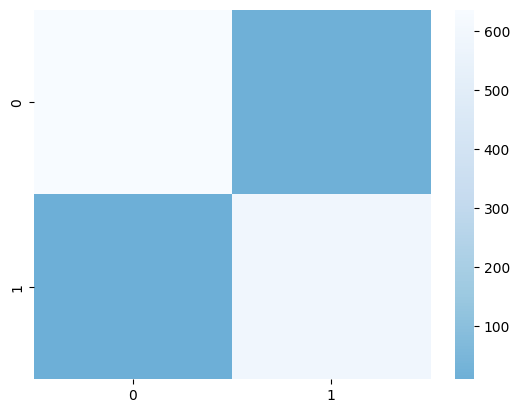

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------------------------------

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()